<a href="https://colab.research.google.com/github/Isurika-2001/CC_PROJEKT/blob/main/Preprocessing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.svm import SVC #import the Support Vector Classifier to implement SVM
from sklearn.naive_bayes import GaussianNB #use GaussianNB due to continous data
import tensorflow as tf #used for training ANN and persisting model
import pickle #used for exporting and importing encoders, scalers.

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [53]:
hotel_bookings = pd.read_csv("/content/hotel_booking_data_cleaned.csv") #read the csv file
hotel_bookings.head(5) #view the first five rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [54]:
# getting some informations about the dataset
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [55]:
# get the total count of data points

total_data_points = hotel_bookings.shape[0]
print(f"Total data points: {total_data_points}")

Total data points: 119390


## Select Features For Model Based On Lit Review
1.
2.
3.
4.

In [56]:
hotel_bookings = hotel_bookings.drop(columns=["is_canceled","lead_time","arrival_date_year","arrival_date_week_number","arrival_date_day_of_month","assigned_room_type","deposit_type","agent","company","days_in_waiting_list","required_car_parking_spaces","reservation_status","reservation_status_date","previous_cancellations","previous_bookings_not_canceled","distribution_channel","is_repeated_guest","booking_changes","total_of_special_requests"])

# Data cleaning process

In [57]:
hotel_bookings.isnull().sum() ## check if any row has "NaN" values

hotel                        0
arrival_date_month           0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
children                     4
babies                       0
meal                         0
country                    488
market_segment               0
reserved_room_type           0
customer_type                0
adr                          0
dtype: int64

# Handle missing values


1.   children - replace with median value
2.   country - drop rows which has missing values

In [58]:
# replace the missing values with median value
hotel_bookings['children'].fillna(hotel_bookings['children'].median(),inplace=True)

In [59]:
# drop rows that have missing values of country
hotel_bookings = hotel_bookings.dropna(axis=0,subset=['country'])

In [60]:
hotel_bookings.isnull().sum() ## check if any row has "NaN" values after handling missing values

hotel                      0
arrival_date_month         0
stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
children                   0
babies                     0
meal                       0
country                    0
market_segment             0
reserved_room_type         0
customer_type              0
adr                        0
dtype: int64

In [61]:
(hotel_bookings.iloc[:,:] == "").sum() #check for any empty string present

hotel                      0
arrival_date_month         0
stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
children                   0
babies                     0
meal                       0
country                    0
market_segment             0
reserved_room_type         0
customer_type              0
adr                        0
dtype: int64

In [62]:
(hotel_bookings.iloc[:,:] == 0).sum() #check for any values containing 0

hotel                           0
arrival_date_month              0
stays_in_weekend_nights     51682
stays_in_week_nights         7594
adults                        393
children                   110323
babies                     117988
meal                            0
country                         0
market_segment                  0
reserved_room_type              0
customer_type                   0
adr                          1938
dtype: int64

In [63]:
# since adults can't be 0 in a general booking case, need to replace 0 with median values
hotel_bookings['adults'] = hotel_bookings['adults'].replace(0, hotel_bookings['adults'].median())

In [64]:
# since adr (average daily rate) can't be 0 in a general booking case, need to replace 0 with median values
hotel_bookings['adr'] = hotel_bookings['adr'].replace(0, hotel_bookings['adr'].median())

In [65]:
(hotel_bookings.iloc[:,:] == 0).sum() #check for any values containing 0 after handling relevent fields 0 values

hotel                           0
arrival_date_month              0
stays_in_weekend_nights     51682
stays_in_week_nights         7594
adults                          0
children                   110323
babies                     117988
meal                            0
country                         0
market_segment                  0
reserved_room_type              0
customer_type                   0
adr                             0
dtype: int64

In [66]:
# write code to identify all duplicate rows  where  the values all dimensions are same within the data

duplicate_rows = hotel_bookings[hotel_bookings.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
print(duplicate_rows)

Number of duplicate rows: 44913
               hotel arrival_date_month  stays_in_weekend_nights  \
1       Resort Hotel               July                        0   
5       Resort Hotel               July                        0   
22      Resort Hotel               July                        2   
35      Resort Hotel               July                        1   
37      Resort Hotel               July                        1   
...              ...                ...                      ...   
119354    City Hotel             August                        0   
119366    City Hotel             August                        2   
119367    City Hotel             August                        2   
119373    City Hotel             August                        1   
119385    City Hotel             August                        2   

        stays_in_week_nights  adults  children  babies meal country  \
1                          0       2       0.0       0   BB     PRT   
5        

In [67]:
# make a copy of hotel bookings data set with only the unique rows
hotel_bookings = hotel_bookings.drop_duplicates()

In [68]:
# get the total count of data points
total_data_points = hotel_bookings.shape[0]
print(f"Total data points: {total_data_points}")

Total data points: 73989


In [69]:
# check duplicates of hotel_bookings_unique
duplicate_rows = hotel_bookings[hotel_bookings.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [hotel, arrival_date_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, reserved_room_type, customer_type, adr]
Index: []


<Axes: >

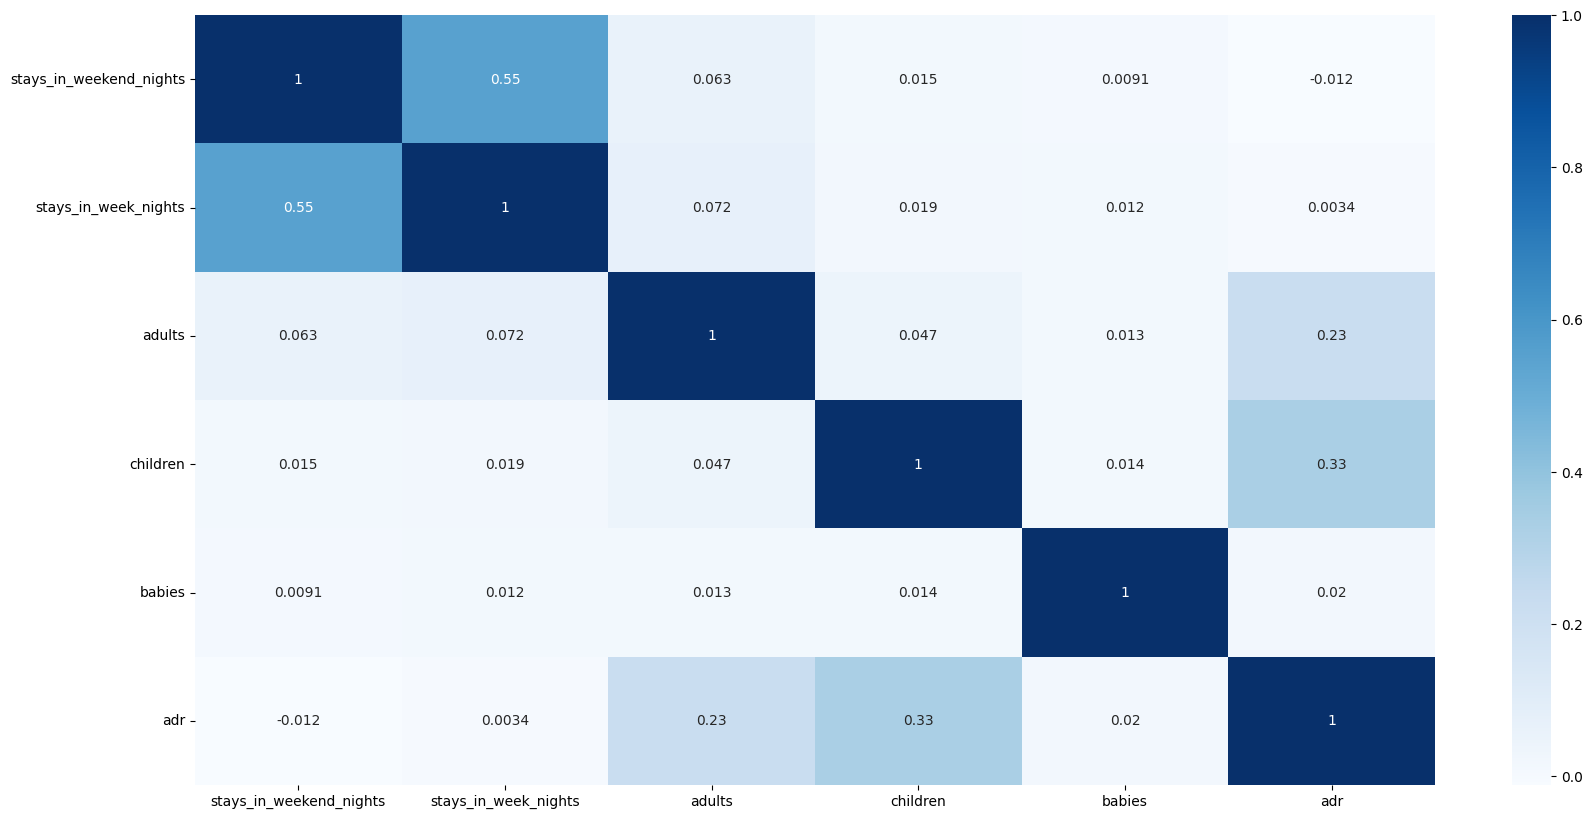

In [70]:
plt.figure(figsize=(20,10))
sb.heatmap(data=hotel_bookings.corr("pearson", numeric_only=True),annot=True,cmap="Blues")

In [71]:
# getting some informations about the dataset
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73989 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel                    73989 non-null  object 
 1   arrival_date_month       73989 non-null  object 
 2   stays_in_weekend_nights  73989 non-null  int64  
 3   stays_in_week_nights     73989 non-null  int64  
 4   adults                   73989 non-null  int64  
 5   children                 73989 non-null  float64
 6   babies                   73989 non-null  int64  
 7   meal                     73989 non-null  object 
 8   country                  73989 non-null  object 
 9   market_segment           73989 non-null  object 
 10  reserved_room_type       73989 non-null  object 
 11  customer_type            73989 non-null  object 
 12  adr                      73989 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 7.9+ MB


# Visualizing for Outliers and Gaussian Distribution

<ipython-input-72-9e3f30268b83>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hotel_bookings.hist(ax=plt.figure(figsize = (20,10)).gca())


array([[<Axes: title={'center': 'stays_in_weekend_nights'}>,
        <Axes: title={'center': 'stays_in_week_nights'}>],
       [<Axes: title={'center': 'adults'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'adr'}>]], dtype=object)

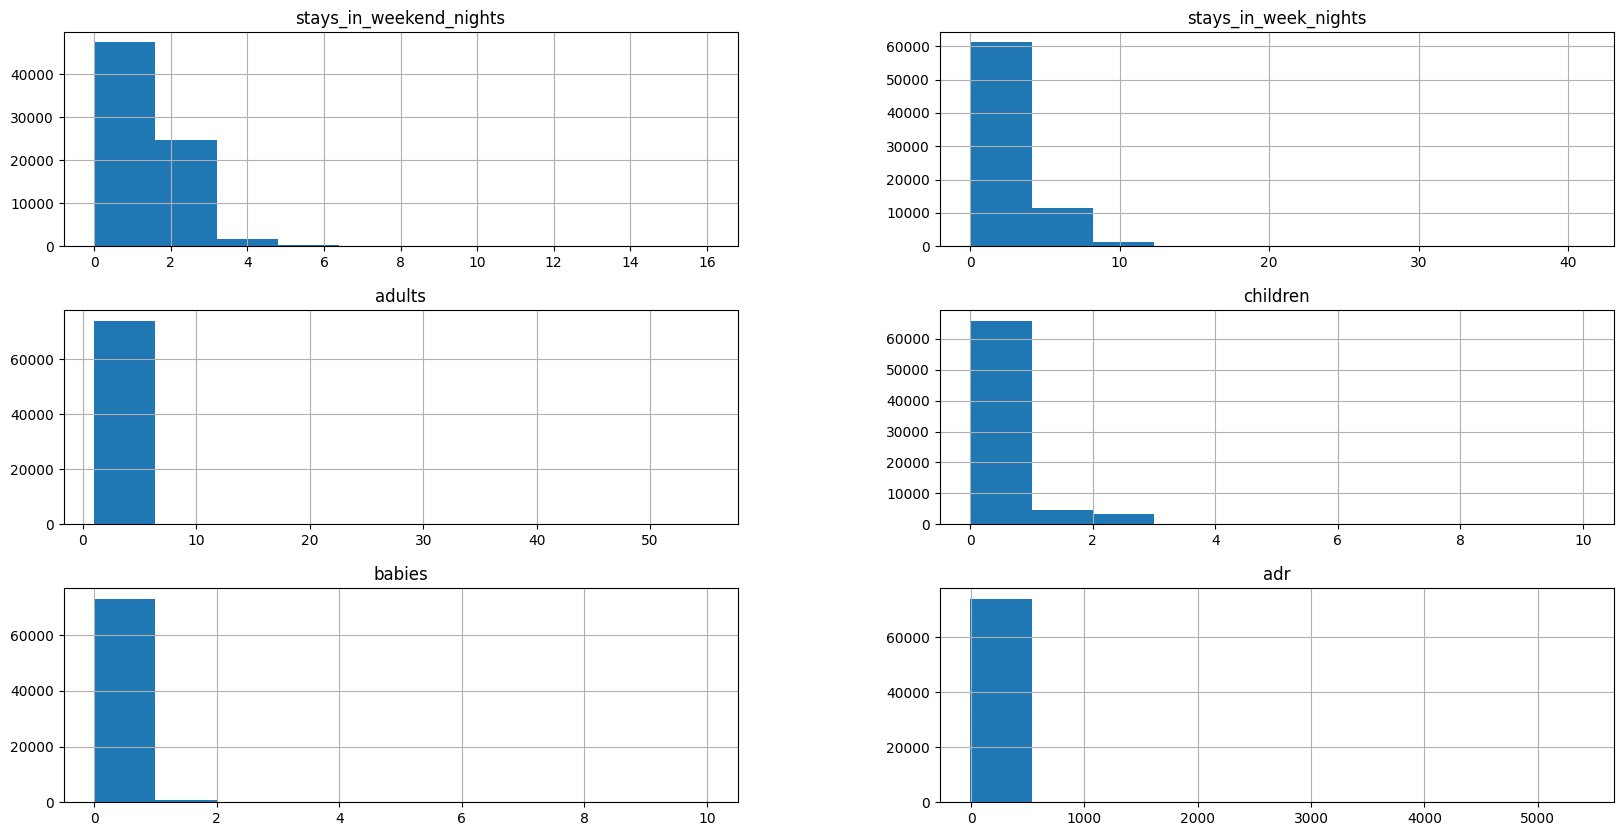

In [72]:
# plot a histogram of features on a feature with 20 inches wide and 10 inches tall
# get the current axis instance (gca) of figure to pass for axis object on dataframe
# hist calls hist() of pyplot of matplotlib to plot histogram for each column
hotel_bookings.hist(ax=plt.figure(figsize = (20,10)).gca())

<Axes: xlabel='arrival_date_month'>

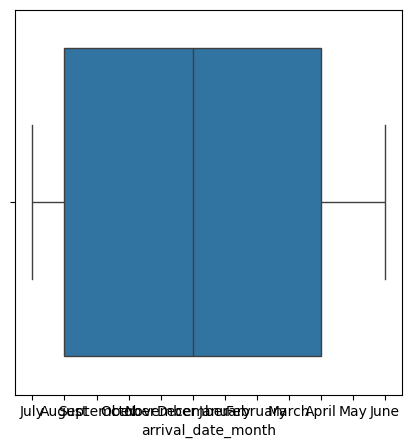

In [73]:
sb.boxplot(ax=plt.figure(figsize=(5,5)).gca(),x=hotel_bookings["arrival_date_month"])

<Axes: xlabel='stays_in_weekend_nights'>

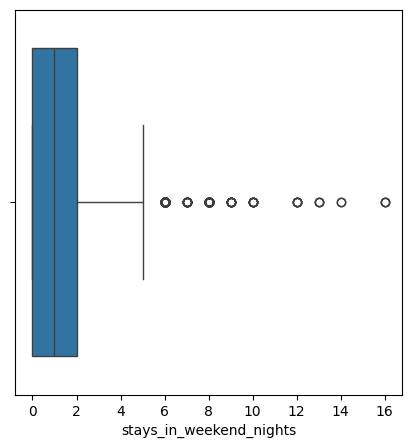

In [74]:
sb.boxplot(ax=plt.figure(figsize=(5,5)).gca(),x=hotel_bookings["stays_in_weekend_nights"])

<Axes: xlabel='stays_in_week_nights'>

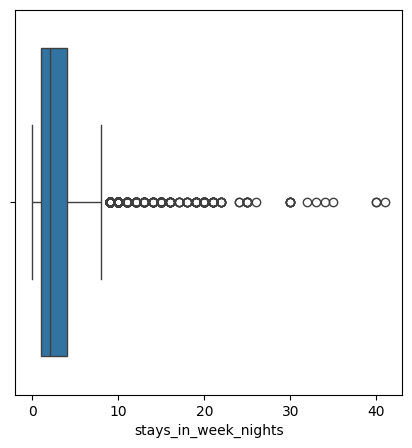

In [75]:
sb.boxplot(ax=plt.figure(figsize=(5,5)).gca(),x=hotel_bookings["stays_in_week_nights"])

<Axes: xlabel='adults'>

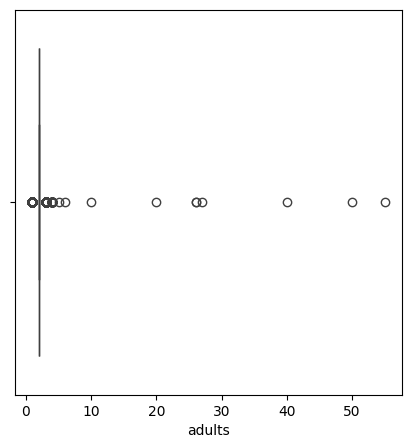

In [76]:
sb.boxplot(ax=plt.figure(figsize=(5,5)).gca(),x=hotel_bookings["adults"])

<Axes: xlabel='children'>

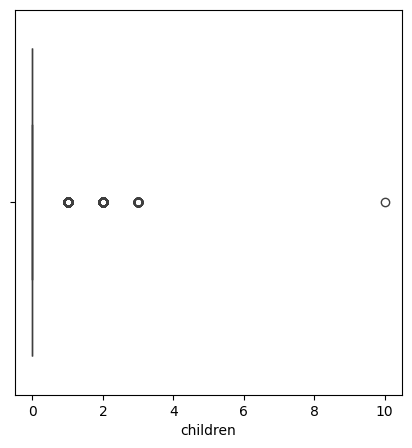

In [77]:
sb.boxplot(ax=plt.figure(figsize=(5,5)).gca(),x=hotel_bookings["children"])

<Axes: xlabel='babies'>

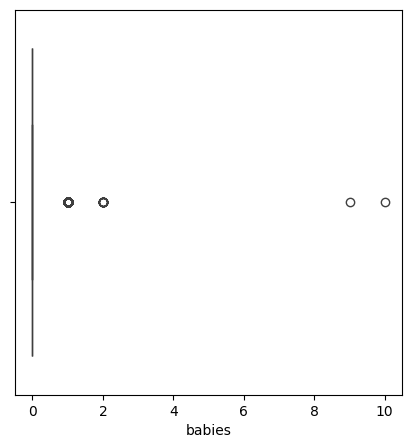

In [78]:
sb.boxplot(ax=plt.figure(figsize=(5,5)).gca(),x=hotel_bookings["babies"])

## Encoding Data
- Encode Hotel - DummyEncoding as thoes are nominal categorical variables
- arrival_date_month - LableEncoding
- meal - LableEncoding
- country - FrequencyEncoding
- market_segment - LableEncoding
- distribution_channel - LableEncoding
- reserved_room_type - LableEncoding
- customer_type - LableEncoding


In [79]:
Counter(hotel_bookings.hotel) #identify types of hotel present in the dataset.

Counter({'Resort Hotel': 28583, 'City Hotel': 45406})

In [80]:
Counter(hotel_bookings.arrival_date_month) #identify types of arrival_date_month present in the dataset.

Counter({'July': 8955,
         'August': 10071,
         'September': 5649,
         'October': 5687,
         'November': 4008,
         'December': 4253,
         'January': 3750,
         'February': 4923,
         'March': 6180,
         'April': 6765,
         'May': 7055,
         'June': 6693})

In [81]:
Counter(hotel_bookings.meal) #identify types of meal present in the dataset.

Counter({'BB': 57076, 'FB': 322, 'HB': 7964, 'SC': 8280, 'Undefined': 347})

In [82]:
Counter(hotel_bookings.country) #identify types of country present in the dataset.

Counter({'PRT': 20799,
         'GBR': 9044,
         'USA': 1772,
         'ESP': 6482,
         'IRL': 2766,
         'FRA': 7380,
         'ROU': 439,
         'NOR': 480,
         'OMN': 18,
         'ARG': 197,
         'POL': 728,
         'DEU': 4674,
         'BEL': 1933,
         'CHE': 1485,
         'CN': 998,
         'GRC': 113,
         'ITA': 2668,
         'NLD': 1792,
         'DNK': 365,
         'RUS': 536,
         'SWE': 764,
         'AUS': 364,
         'EST': 76,
         'CZE': 123,
         'BRA': 1852,
         'FIN': 415,
         'MOZ': 48,
         'BWA': 1,
         'LUX': 244,
         'SVN': 44,
         'ALB': 11,
         'IND': 138,
         'CHN': 747,
         'MEX': 71,
         'MAR': 226,
         'UKR': 58,
         'SMR': 1,
         'LVA': 49,
         'PRI': 10,
         'SRB': 44,
         'CHL': 63,
         'AUT': 853,
         'BLR': 24,
         'LTU': 73,
         'TUR': 195,
         'ZAF': 77,
         'AGO': 336,
         'ISR': 361

In [83]:
Counter(hotel_bookings.market_segment) #identify types of market_segment present in the dataset.

Counter({'Direct': 10596,
         'Corporate': 2243,
         'Online TA': 46288,
         'Offline TA/TO': 11199,
         'Complementary': 444,
         'Groups': 3016,
         'Undefined': 2,
         'Aviation': 201})

In [84]:
Counter(hotel_bookings.reserved_room_type) #identify types of reserved_room_type present in the dataset.

Counter({'C': 885,
         'A': 45343,
         'D': 15842,
         'E': 5688,
         'G': 1986,
         'F': 2731,
         'H': 590,
         'L': 6,
         'B': 917,
         'P': 1})

In [85]:
Counter(hotel_bookings.customer_type) #identify types of customer_type present in the dataset.

Counter({'Transient': 62368,
         'Contract': 2687,
         'Transient-Party': 8435,
         'Group': 499})

In [86]:
hotel_bookings_features = hotel_bookings.values
hotel_bookings_features[[0]]

array([['Resort Hotel', 'July', 0, 0, 2, 0.0, 0, 'BB', 'PRT', 'Direct',
        'C', 'Transient', 95.0]], dtype=object)

In [87]:
encoder = ColumnTransformer(transformers=[("encoder",OneHotEncoder(drop="first"),[0])],remainder="passthrough") #apply transformers to columns of a np array and do not drop the other columns
encoder.fit(hotel_bookings_features) #fit the OneHotEncoder on the passed independent features.
hotel_bookings_features = encoder.transform(hotel_bookings_features) # introduct the dummies to the features and drop the hotel column

hotel_bookings_features[[0]]

array([[1.0, 'July', 0, 0, 2, 0.0, 0, 'BB', 'PRT', 'Direct', 'C',
        'Transient', 95.0]], dtype=object)

In [88]:
# perform lable encoding for arrival_date_month of array hotel_bookings_features
label_encoder = LabelEncoder()
hotel_bookings_features[:, 1] = label_encoder.fit_transform(hotel_bookings_features[:, 1])

hotel_bookings_features[[0]]

array([[1.0, 5, 0, 0, 2, 0.0, 0, 'BB', 'PRT', 'Direct', 'C', 'Transient',
        95.0]], dtype=object)

In [89]:
# perform lable encoding for meal of array hotel_bookings_features
label_encoder = LabelEncoder()
hotel_bookings_features[:, 7] = label_encoder.fit_transform(hotel_bookings_features[:, 7])

hotel_bookings_features[[0]]

array([[1.0, 5, 0, 0, 2, 0.0, 0, 0, 'PRT', 'Direct', 'C', 'Transient',
        95.0]], dtype=object)

In [90]:
# perform lable encoding for country of array hotel_bookings_features
country_col = hotel_bookings_features[:, 8]

# Count the frequency of each country category
country_counts = Counter(country_col)

# Create a dictionary mapping each country category to its frequency
country_frequency_map = {country: country_counts[country] for country in country_counts}

# Replace each country category with its frequency in the dataset
hotel_bookings_features[:, 8] = [country_frequency_map[country] for country in country_col]

hotel_bookings_features[[0]]

array([[1.0, 5, 0, 0, 2, 0.0, 0, 0, 20799, 'Direct', 'C', 'Transient',
        95.0]], dtype=object)

In [91]:
# perform lable encoding for market_segment of array hotel_bookings_features
label_encoder = LabelEncoder()
hotel_bookings_features[:, 9] = label_encoder.fit_transform(hotel_bookings_features[:, 9])

hotel_bookings_features[[0]]

array([[1.0, 5, 0, 0, 2, 0.0, 0, 0, 20799, 3, 'C', 'Transient', 95.0]],
      dtype=object)

In [92]:
# perform lable encoding for reserved_room_type of array hotel_bookings_features
label_encoder = LabelEncoder()
hotel_bookings_features[:, 10] = label_encoder.fit_transform(hotel_bookings_features[:, 10])

hotel_bookings_features[[0]]

array([[1.0, 5, 0, 0, 2, 0.0, 0, 0, 20799, 3, 2, 'Transient', 95.0]],
      dtype=object)

In [93]:
# perform lable encoding for customer_type of array hotel_bookings_features
label_encoder = LabelEncoder()
hotel_bookings_features[:, 11] = label_encoder.fit_transform(hotel_bookings_features[:, 11])

hotel_bookings_features[[0]]

array([[1.0, 5, 0, 0, 2, 0.0, 0, 0, 20799, 3, 2, 2, 95.0]], dtype=object)

In [94]:
# Create a list of column names excluding "arrival_date_month"
column_names = list(range(hotel_bookings_features.shape[1]))  # Assuming each column represents a feature

# Remove the index corresponding to "arrival_date_month" if needed
if "arrival_date_month" in column_names:
    column_names.remove("arrival_date_month")

# Initialize empty lists to store upper and lower limits for each column
upper_limits = []
lower_limits = []

# Loop through each column and calculate upper and lower limits using quantiles
for column_idx in column_names:
    column_values = hotel_bookings_features[:, column_idx]
    q1 = np.quantile(column_values, 0.25)
    q3 = np.quantile(column_values, 0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    upper_limits.append(upper_limit)
    lower_limits.append(lower_limit)

# Print the upper and lower limits for each column
for i, column_idx in enumerate(column_names):
    print(f"Column {column_idx}: Upper Limit = {upper_limits[i]}, Lower Limit = {lower_limits[i]}")

Column 0: Upper Limit = 2.5, Lower Limit = -1.5
Column 1: Upper Limit = 17.0, Lower Limit = -7.0
Column 2: Upper Limit = 5.0, Lower Limit = -3.0
Column 3: Upper Limit = 8.5, Lower Limit = -3.5
Column 4: Upper Limit = 2.0, Lower Limit = 2.0
Column 5: Upper Limit = 0.0, Lower Limit = 0.0
Column 6: Upper Limit = 0.0, Lower Limit = 0.0
Column 7: Upper Limit = 0.0, Lower Limit = 0.0
Column 8: Upper Limit = 49098.0, Lower Limit = -26366.0
Column 9: Upper Limit = 7.5, Lower Limit = 3.5
Column 10: Upper Limit = 7.5, Lower Limit = -4.5
Column 11: Upper Limit = 2.0, Lower Limit = 2.0
Column 12: Upper Limit = 230.5, Lower Limit = -13.5


In [95]:
# replace outliers with uppermost value

for i in range(len(hotel_bookings_features)):
    for j in range(len(hotel_bookings_features[0])):
        if hotel_bookings_features[i][j] > upper_limits[j]:
            hotel_bookings_features[i][j] = upper_limits[j]


# Splitting Training/Test/Validation Data
- where 75% training, 25% testing

In [96]:
x_train, x_test = train_test_split(hotel_bookings_features, test_size=0.25, random_state=42)

# Feature scaling

In [97]:
scaler = RobustScaler() #by default it takes the with_scaling as 25th and 75th percentile so scale and centers around median
scaler.fit(x_train)
#fit will calculate the meadian and the IQR independently for each feature

RobustScaler()

In [98]:
x_train = scaler.transform(x_train) #apply the robust scaler formula to train set based on computed Q2, IQR
x_test = scaler.transform(x_test) #apply the robust scaler formula to test set based on computed Q2, IQR

# Create two DataFrames to train and test

In [99]:
column_names = [
    'hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
    'reserved_room_type','customer_type', 'adr'
]

df_train = pd.DataFrame(x_train, columns=column_names) # train dataframe
df_test = pd.DataFrame(x_test, columns=column_names) # test dataframe

In [100]:
# Display the descriptive statistics
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hotel,55491.0,0.388099,0.487322,0.000000,0.000000,0.0,1.000000,1.000000
arrival_date_month,55491.0,0.040709,0.579211,-0.833333,-0.500000,0.0,0.500000,1.000000
stays_in_weekend_nights,55491.0,0.028365,0.503884,-0.500000,-0.500000,0.0,0.500000,2.000000
stays_in_week_nights,55491.0,0.224565,0.615770,-0.666667,-0.333333,0.0,0.666667,2.166667
adults,55491.0,-0.167397,0.373333,-1.000000,0.000000,0.0,0.000000,0.000000
children,55491.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
babies,55491.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
meal,55491.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
country,55491.0,0.086817,0.414888,-0.391127,-0.288720,0.0,0.711280,0.711280
market_segment,55491.0,-0.830982,1.282004,-6.000000,-1.000000,0.0,0.000000,1.000000


# Gaussian Mixture Model algorithm

In [101]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

In [105]:
# create a copy of df_train to apply DBSCAN algorithm
df_train_GMM = df_train.copy()

In [106]:
# Define the model
gaussian_model = GaussianMixture(n_components=6)

# Select numerical features for clustering
selected_features = ['hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
    'reserved_room_type','customer_type', 'adr']

# Train the model on selected features
gaussian_model.fit(df_train_GMM[selected_features])

# Assign each data point to a cluster
gaussian_result = gaussian_model.predict(df_train_GMM[selected_features])

# Get all of the unique clusters
gaussian_clusters = np.unique(gaussian_result)

In [107]:
# prompt: calculate silhouette and print

silhouette_avg = silhouette_score(df_train_GMM, gaussian_result)
print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.10844882980088387


In [52]:
from sklearn.cluster import DBSCAN

# Apply K-Means algorithm

KMeans clustering with 4 clusters

In [114]:
# create a copy of df_train to apply K-Means algorithm
df_train_kmeans = df_train[['hotel', 'arrival_date_month', 'adults', 'children', 'babies', 'meal', 'country', 'reserved_room_type', 'adr']]

In [115]:
kmeans = KMeans(n_clusters=4)
# Fit the model
kmeans.fit(df_train_kmeans)
# Predict the clusters
labels = kmeans.predict(df_train_kmeans)
# Assign the cluster labels to the original dataframe
df_train_kmeans['Cluster'] = labels
# Calculate the Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-115-6dbfa3022548>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_kmeans['Cluster'] = labels


<ipython-input-116-c0bba32da97d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_train_kmeans['Cluster'], palette= pal)
<ipython-input-116-c0bba32da97d>:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.countplot(x=df_train_kmeans['Cluster'], palette= pal)


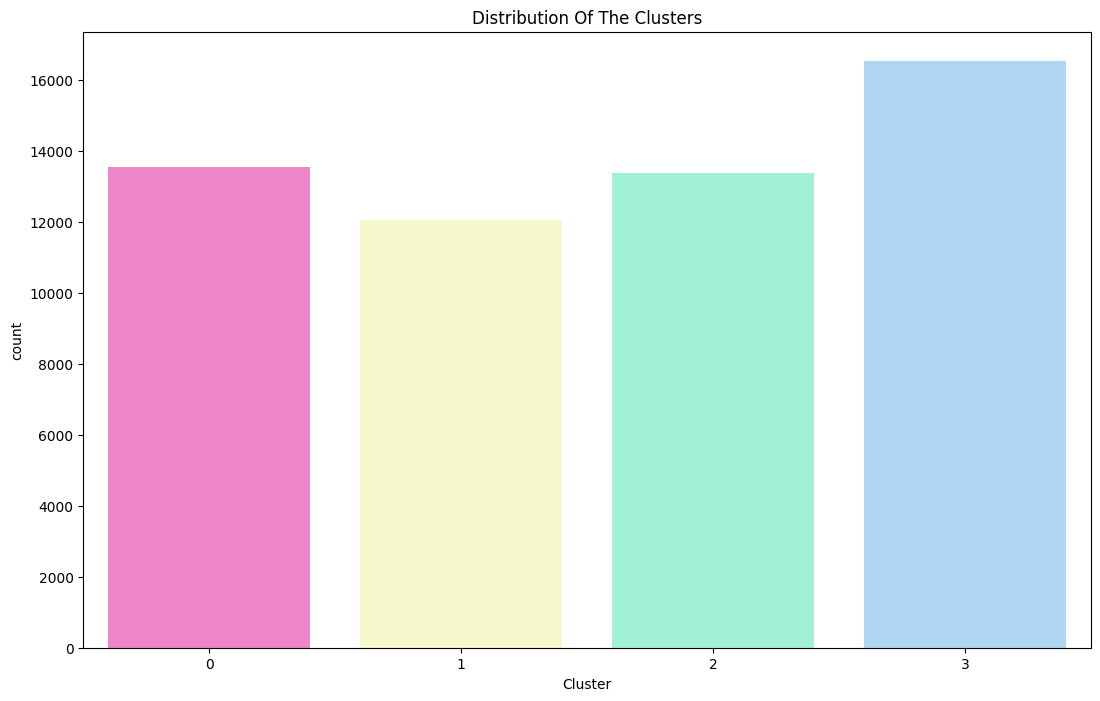

In [116]:
pal = ['#FF76CE','#FDFFC2','#94FFD8','#A3D8FF','#FF8A08']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=df_train_kmeans['Cluster'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

In [117]:
silhouette_avg = silhouette_score(df_train_kmeans, labels)
print(f"Mean Silhouette Score: {silhouette_avg:.2f}")

Mean Silhouette Score: 0.38


KMeans clustering with 7 cluster

In [ ]:
# create a copy of df_train to apply K-Means algorithm
df_train_kmeans = df_train.copy()

In [ ]:
kmeans = KMeans(n_clusters=7)
# Fit the model
kmeans.fit(df_train_kmeans)
# Predict the clusters
labels = kmeans.predict(df_train_kmeans)
# Assign the cluster labels to the original dataframe
df_train_kmeans['Cluster'] = labels
# Calculate the Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-68-c0bba32da97d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_train_kmeans['Cluster'], palette= pal)
<ipython-input-68-c0bba32da97d>:3: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=df_train_kmeans['Cluster'], palette= pal)


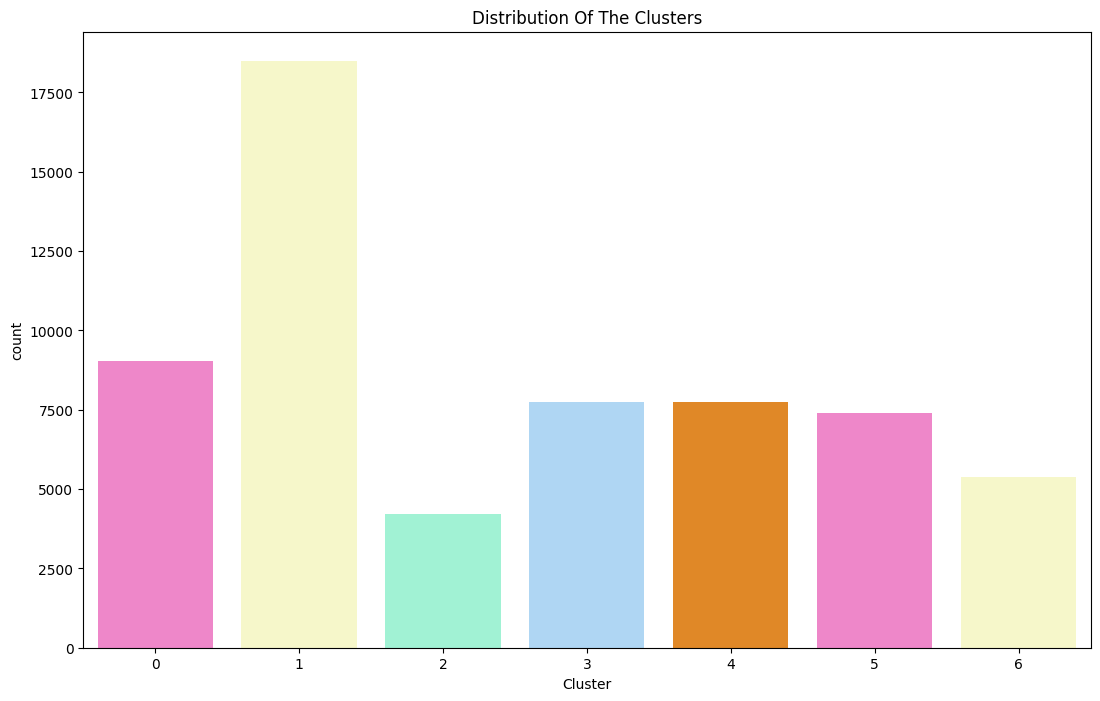

In [ ]:
pal = ['#FF76CE','#FDFFC2','#94FFD8','#A3D8FF','#FF8A08']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=df_train_kmeans['Cluster'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(df_train_kmeans, labels)
print(f"Mean Silhouette Score: {silhouette_avg:.2f}")

Mean Silhouette Score: 0.29


# Apply Mini-batch K-Means algorithm

Mini-batch KMeans clustering with 4 clusters, batch size of 10

In [108]:
from sklearn.cluster import MiniBatchKMeans

In [109]:
# create a copy of df_train to apply Mini-batch K-Means algorithm
df_train_miniBatchKmeans = df_train[['hotel', 'arrival_date_month', 'adults', 'children', 'babies', 'meal', 'country', 'reserved_room_type', 'adr']]

In [110]:
# Define the MiniBatchKMeans model with desired parameters
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10)

In [111]:
# Fit the model
minibatch_kmeans.fit(df_train_miniBatchKmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=10, n_clusters=10)

In [112]:
# Predict the clusters
labels = minibatch_kmeans.predict(df_train_miniBatchKmeans)

In [66]:
# Assign the cluster labels to the original dataframe
df_train_miniBatchKmeans['Cluster'] = labels

In [67]:
df_train_miniBatchKmeans.head(5)

,hotel,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,reserved_room_type,customer_type,adr,Cluster
0,0.0,0.000000,0.5,-0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.364590,3
1,0.0,-0.666667,0.0,0.333333,0.0,0.0,0.0,0.0,0.088201,-1.0,0.0,0.0,-0.262459,3
2,0.0,-0.833333,-0.5,0.333333,0.0,0.0,0.0,0.0,-0.372045,0.0,0.0,0.0,0.231803,3
3,1.0,0.500000,0.5,1.000000,0.0,0.0,0.0,0.0,-0.244567,0.0,0.0,0.0,-0.287377,2
4,0.0,0.333333,0.5,2.000000,0.0,0.0,0.0,0.0,-0.296194,0.0,1.0,0.0,-0.311639,2


In [ ]:
# Group the data by 'Cluster' and calculate the mode for each group
mode_per_cluster = df_train_miniBatchKmeans.groupby('Cluster').apply(lambda x: x.mode().iloc[0])

# Reset index to make the cluster column a regular column instead of index
mode_per_cluster.reset_index(drop=True, inplace=True)

print(mode_per_cluster)

0  hotel  arrival_date_month  stays_in_weekend_nights  stays_in_week_nights  \
0    0.0            0.000000                      0.5              0.333333   
1    0.0           -0.666667                     -0.5              0.000000   
2    1.0           -0.666667                     -0.5             -0.333333   
3    0.0            0.333333                     -0.5              0.000000   

0  adults  children  babies  meal   country  market_segment  \
0     0.0       0.0     0.0   0.0  0.721797             0.0   
1     0.0       0.0     0.0   0.0  0.721797             0.0   
2     0.0       0.0     0.0   0.0  0.721797            -3.0   
3     0.0       0.0     0.0   0.0  0.721797             0.0   

0  distribution_channel  is_repeated_guest  reserved_room_type  \
0                   0.0                0.0                 0.0   
1                   0.0                0.0                 1.0   
2                  -2.0                0.0                 0.0   
3                   0.0 

In [ ]:
reverse_scaled_data = mode_per_cluster.copy()

In [ ]:
columns_to_reverse_scale = reverse_scaled_data.columns[:-1]

In [ ]:
# Reverse scaling for each column
for column_idx, column in enumerate(columns_to_reverse_scale):
    # Retrieve median and IQR values for the current column
    median = scaler.center_[column_idx]
    iqr = scaler.scale_[column_idx]

    # Reverse scaling using median and IQR
    reverse_scaled_data[column] = reverse_scaled_data[column] * iqr + median

In [ ]:
print(reverse_scaled_data.to_string(index=False))

 hotel  arrival_date_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  country  market_segment  distribution_channel  is_repeated_guest  reserved_room_type  booking_changes  customer_type       adr  total_of_special_requests  Cluster
   0.0                 5.0                      2.0                   3.0     2.0       0.0     0.0   0.0  23594.0             6.0                   3.0                0.0                 0.0              0.0            2.0 140.00000                        2.0      0.0
   0.0                 1.0                      0.0                   2.0     2.0       0.0     0.0   0.0  23594.0             6.0                   3.0                0.0                 3.0              0.0            2.0 227.31875                        0.0      1.0
   1.0                 1.0                      0.0                   1.0     2.0       0.0     0.0   0.0  23594.0             3.0                   1.0                0.0                 0.

In [113]:
# Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_train_miniBatchKmeans, labels)
print(f"Mean Silhouette Score: {silhouette_avg:.2f}")

Mean Silhouette Score: 0.23


Mini Batch KMeans with 15 batch size and new method

In [89]:
from sklearn.cluster import MiniBatchKMeans, KMeans

from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

In [98]:
centers = df_train.copy()

In [99]:
kmeans = MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=50)
centers["Cluster"] = kmeans.fit_predict(centers)
centers["Cluster"] = centers["Cluster"].astype("int")
print(centers.head(10))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   hotel  arrival_date_month  stays_in_weekend_nights  stays_in_week_nights  \
0    0.0            0.000000                      0.5             -0.333333   
1    0.0           -0.666667                      0.0              0.333333   
2    0.0           -0.833333                     -0.5              0.333333   
3    1.0            0.500000                      0.5              1.000000   
4    0.0            0.333333                      0.5              2.000000   
5    1.0            0.666667                      0.0              0.000000   
6    0.0            0.333333                      0.5              0.333333   
7    0.0            0.000000                      0.0              0.666667   
8    0.0            0.166667                      0.5              1.000000   
9    1.0            1.000000                     -0.5             -0.333333   

   adults  children  babies  meal   country  market_segment  \
0     0.0       0.0     0.0   0.0  0.000000             0.0   
1   

In [102]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(centers, centers["Cluster"])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.2481874232350658


# Apply hierarchical clustering

In [ ]:
# create a copy of df_train to apply hierarchical clustering
df_train_hierarchical_clustering = df_train.copy()

In [ ]:
# implemenet Hierarchical Clustering for df_train_hierarchical_clustering

# Import necessary libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Scale the data
scaler = RobustScaler()
df_train_hierarchical_clustering_scaled = scaler.fit_transform(df_train_hierarchical_clustering)

In [ ]:

# Perform hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(df_train_hierarchical_clustering_scaled, method='ward'))

# Choose the number of clusters based on the dendrogram
num_clusters = 4

# Perform agglomerative clustering with the chosen number of clusters
hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(df_train_hierarchical_clustering_scaled)

In [ ]:
# Assign cluster labels to the original dataframe
df_train_hierarchical_clustering['Cluster'] = labels

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_train_hierarchical_clustering, labels)
print(f"Mean Silhouette Score: {silhouette_avg:.2f}")

# Print the cluster centers
cluster_centers = df_train_hierarchical_clustering.groupby('Cluster').mean()
print(cluster_centers)

# Checking the actual data values

In [ ]:
Counter(hotel_bookings.hotel) #identify types of hotel present in the dataset.

Create sample dataframe after encoding

In [ ]:
column_names = [
    'hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
    'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'reserved_room_type', 'booking_changes',
    'customer_type', 'adr', 'total_of_special_requests'
]

df_sample = pd.DataFrame(hotel_bookings_features, columns=column_names) # sample dataframe

In [ ]:
Counter(df_sample.hotel) #identify types of hotel present in the dataset.

In [ ]:
Counter(hotel_bookings.arrival_date_month) #identify types of arrival_date_month present in the dataset.

In [ ]:
Counter(df_sample.arrival_date_month) #identify types of arrival_date_month present in the dataset.

In [ ]:
Counter(hotel_bookings.meal) #identify types of meal present in the dataset.

In [ ]:
Counter(df_sample.meal) #identify types of meal present in the dataset.

In [ ]:
Counter(hotel_bookings.country) #identify types of country present in the dataset.

In [ ]:
Counter(df_sample.country) #identify types of country present in the dataset.

In [ ]:
Counter(hotel_bookings.market_segment) #identify types of market_segment present in the dataset.

In [ ]:
Counter(df_sample.market_segment) #identify types of market_segment present in the dataset.

In [ ]:
Counter(hotel_bookings.distribution_channel) #identify types of distribution_channel present in the dataset.

In [ ]:
Counter(df_sample.distribution_channel) #identify types of distribution_channel present in the dataset.

In [ ]:
Counter(hotel_bookings.reserved_room_type) #identify types of reserved_room_type present in the dataset.

In [ ]:
Counter(df_sample.reserved_room_type) #identify types of reserved_room_type present in the dataset.

In [ ]:
Counter(hotel_bookings.customer_type) #identify types of customer_type present in the dataset.

In [ ]:
Counter(df_sample.customer_type) #identify types of customer_type present in the dataset.